In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [85]:
# 1 Загрузите файл HR.csv в pandas dataframe

df = pd.read_csv('HR.csv')

In [86]:
# Признаки:
# 1. satisfaction_level - Уровень удовлетворенности работой
# 2. Last_evaluation - Время с момента последней оценки в годах
# 3. number_projects - Количество проектов, выполненных за время работы
# 4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
# 5. time_spend_company - Стаж работы в компании в годах
# 6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
# 7. left - уволился ли сотрудник
# 8. promotion_last_5years - повышался ли сотрудник за последние пять лет
# 9. department - отдел в котором работает сотрудник
# 10. salary - относительный уровень зарплаты

In [87]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [89]:
# 2 Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение).

df.describe(include='all')    # среднее, мин/макс и ср.отклонение смотрим с помощью describe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [90]:
df_2 = df.drop(columns=['department', 'salary'])    # для расчета медианы и моды убираем нечисловые значения

In [91]:
df_2.median()   # находим медиану для всех количественных столбцов

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [92]:
df_2.mode()   # находим моду для всех количественных столбцов

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Корреляционная матрица числовых значений данных \nпо опросу уровня удовлетворенности сотрудников работой')

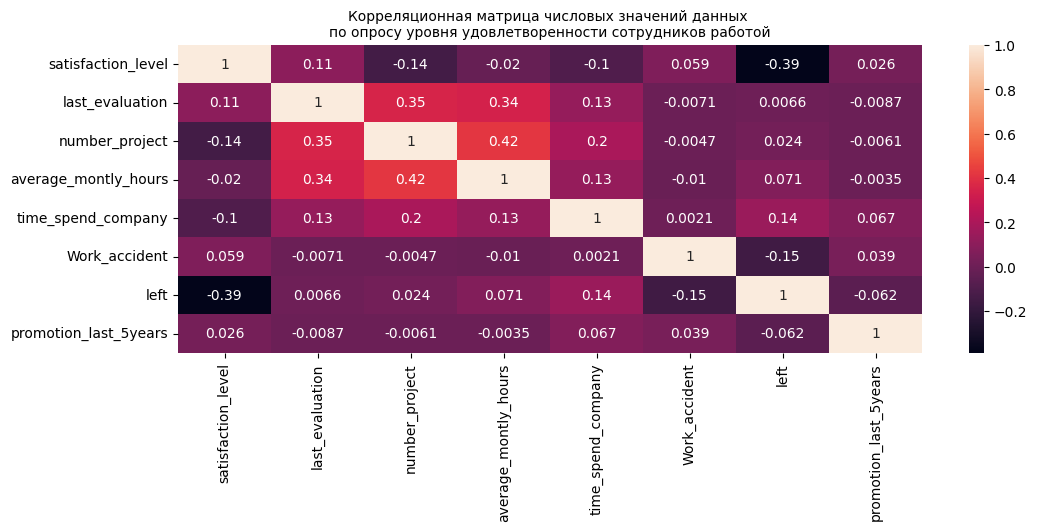

In [93]:
# 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

df_2.corr()
plt.figure(figsize=(12, 4))
sns.heatmap(df_2.corr(), annot=True)  #, annot_kws={"size": 10})
plt.title('Корреляционная матрица числовых значений данных \nпо опросу уровня удовлетворенности сотрудников работой', fontsize=10)

In [94]:
# Две наиболее скоррелированные переменные: left и satisfaction_level, которые имеют обратную корреляцию с уровнем 0.39
# Две наименее скоррелированные переменные: Work_accident и time_spend_company, с уровнем корреляции 0.0021 (хотя на каком-нибудь
# другом производстве в целом было бы даже логично, что у "стареньких" работников кол-во несчастных случаев чаще > 0, чем у "молодых")

In [95]:
# 4 Рассчитайте сколько сотрудников работает в каждом департаменте.

df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [96]:
# 5 Показать распределение сотрудников по зарплатам.

df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [97]:
# 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

grouped = pd.pivot_table(df[['department', 'salary']], index='department', columns='salary', aggfunc=len, fill_value=0)
grouped

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


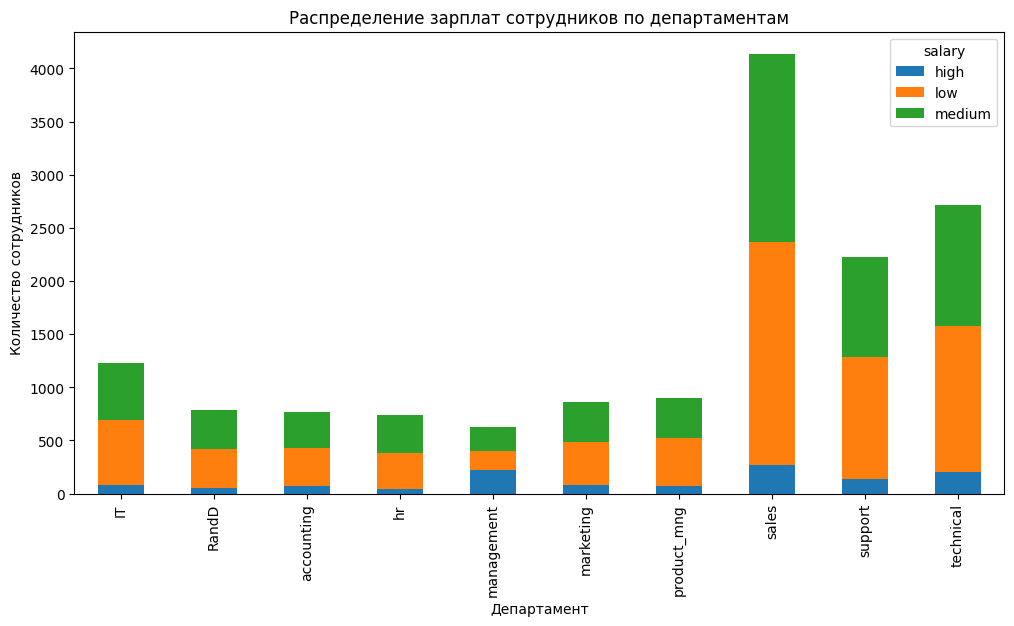

In [98]:
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Распределение зарплат сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.show()

In [99]:
# 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени,
# чем сотрудники с низким окладом

high_salary = df.loc[(df['salary'] == 'high'), ['average_montly_hours']]    # выделяем наборы данных по времени, проведенным на работе,
low_salary = df.loc[(df['salary'] == 'low'), ['average_montly_hours']]      # для сотрудников с высокой зарплатой и сотрудников с низкой зарплатой

In [100]:
stat, p = st.shapiro(high_salary)     # проверка нормальности распределения

print(f"Статистика = {stat:.3f}, p = {p:.5f}")

if p < 0.05:    # условие статистической значимости
        print("Данные распределены не нормально")
else:
        print("Данные распределены нормально")

Статистика = 0.971, p = 0.00000
Данные распределены не нормально


In [101]:
stat, p = st.shapiro(low_salary)     # проверка нормальности распределения

print(f"Статистика = {stat:.3f}, p = {p:.5f}")

if p < 0.05:    # условие статистической значимости
        print("Данные распределены не нормально")
else:
        print("Данные распределены нормально")

Статистика = 0.960, p = 0.00000
Данные распределены не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [102]:
# т.к. не имеем нормального распределения данных, применяем тест Манна-Уитни

# Формируем гипотезы:
# H0 - среднее время, проведенное на работе сотрудниками с высоким окладом и сотрудниками с низким окладом, не отличается
# H1 - сотрудники с высоким окладом проводят на работе больше (меньше) времени, чем сотрудники с низким окладом

stat, p = st.mannwhitneyu(high_salary, low_salary)

print(f"p = {p}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, нет разницы между временем, проведенным на работе (распределения, вероятно, одинаковые)')
else:
    print('Отклоняем нулевую гипотезу, есть разница между временем, проведенным на работе (распределения, вероятно, различаются)')

p = [0.82413307]
Не отклоняем нулевую гипотезу, нет разницы между временем, проведенным на работе (распределения, вероятно, одинаковые)


Text(0.5, 1.0, 'Сотрудники с низкой зарплатой')

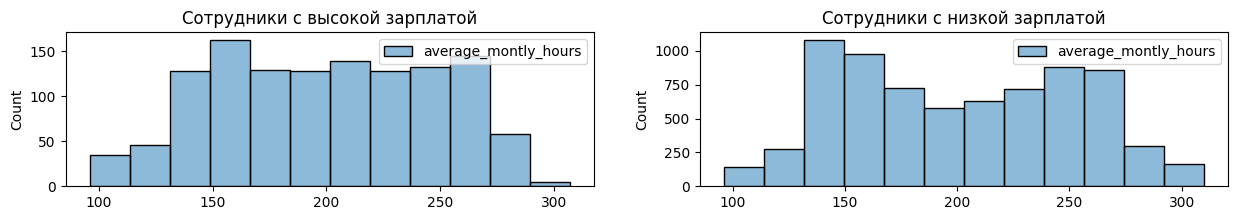

In [103]:
fig, ax = plt.subplots(1,2, figsize=[15,2])     # визуально гистограммы тоже очень похожи

b1 = sns.histplot(high_salary, ax=ax[0], bins=12)
b1.set_title("Сотрудники с высокой зарплатой")
b2 = sns.histplot(low_salary, ax=ax[1], bins=12)
b2.set_title("Сотрудники с низкой зарплатой")

In [104]:
# 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов

In [105]:
print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников = {round(df['promotion_last_5years'].loc[df['left'] == 1].mean()*100, 2)} %")
print(f"Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников = {round(df['promotion_last_5years'].loc[df['left'] == 0].mean()*100, 2)} %")

Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников = 0.53 %
Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников = 2.63 %


In [106]:
print(f"Средняя степень удовлетворенности у уволившихся сотрудников = {round(df['satisfaction_level'].loc[df['left'] == 1].mean(), 2)}")
print(f"Средняя степень удовлетворенности у не уволившихся сотрудников = {round(df['satisfaction_level'].loc[df['left'] == 0].mean(), 2)}")

Средняя степень удовлетворенности у уволившихся сотрудников = 0.44
Средняя степень удовлетворенности у не уволившихся сотрудников = 0.67


In [107]:
print(f"Среднее количество проектов у уволившихся сотрудников = {round(df['number_project'].loc[df['left'] == 1].mean(), 2)}")
print(f"Среднее количество проектов у не уволившихся сотрудников = {round(df['number_project'].loc[df['left'] == 0].mean(), 2)}")

Среднее количество проектов у уволившихся сотрудников = 3.86
Среднее количество проектов у не уволившихся сотрудников = 3.79


In [108]:
# 9 Разделить данные на тестовую и обучающую выборки.
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
# Оценить качество модели на тестовой выборке.

In [109]:
target = df['left']    # целевая переменная 'left'

In [110]:
data = df.drop(['department', 'salary'], axis=1)   # удаляем столбцы с нечисловыми данными

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)   # делим данные на тестовую и обучающую выборки

In [112]:
lda = LinearDiscriminantAnalysis()   # строим модель LDA
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [113]:
lda.predict(X_test)   # строим прогноз

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T    # смотрим визуально на разницу факта и прогноза
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
3297,0.0,NaN
14113,0.0,NaN
5514,0.0,NaN
9939,0.0,NaN


In [115]:
accuracy_score(y_test, lda.predict(X_test))   # точность модели = 0.75 является достаточно хорошим результатом работы модели

0.7533333333333333